### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load and Understand The Data

In [ ]:
df = pd.read_csv('penguins.csv', index_col = 0)
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


# 1. Data Preparation

## Exploration

In [ ]:
df.shape

(344, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


## Cleaning

In [ ]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [ ]:
df_clean = df_clean.drop(columns=['year'])

## Validation

In [ ]:
(df_clean[df_clean['bill_length_mm'] < 0])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
df_clean[df_clean['bill_depth_mm'] < 0]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
df_clean[df_clean['flipper_length_mm'] < 0]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
df_clean[df_clean['body_mass_g'] < 0]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


# 2. EDA(Exploratory Data Analysis)

In [ ]:
df_clean.shape

(333, 7)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [ ]:
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df_clean.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


# 3. Data Visualization

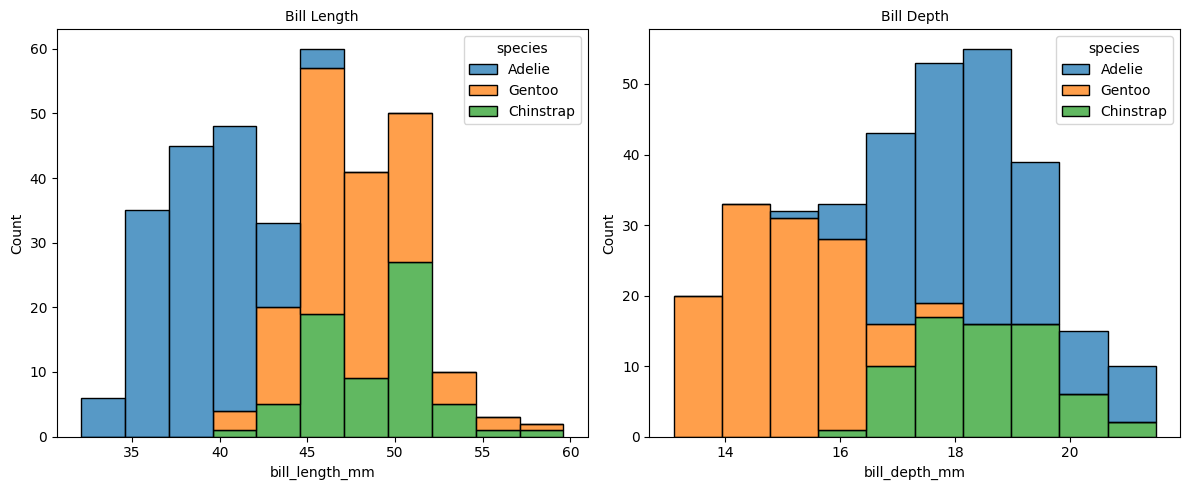

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bill Length
sns.histplot(x='bill_length_mm', data=df_clean, hue='species', multiple='stack', ax=axes[0])
axes[0].set_title('Bill Length', size=10)

# Bill Depth
sns.histplot(x='bill_depth_mm', data=df_clean, hue='species', multiple='stack', ax=axes[1])
axes[1].set_title('Bill Depth', size=10)

plt.tight_layout()
plt.show()

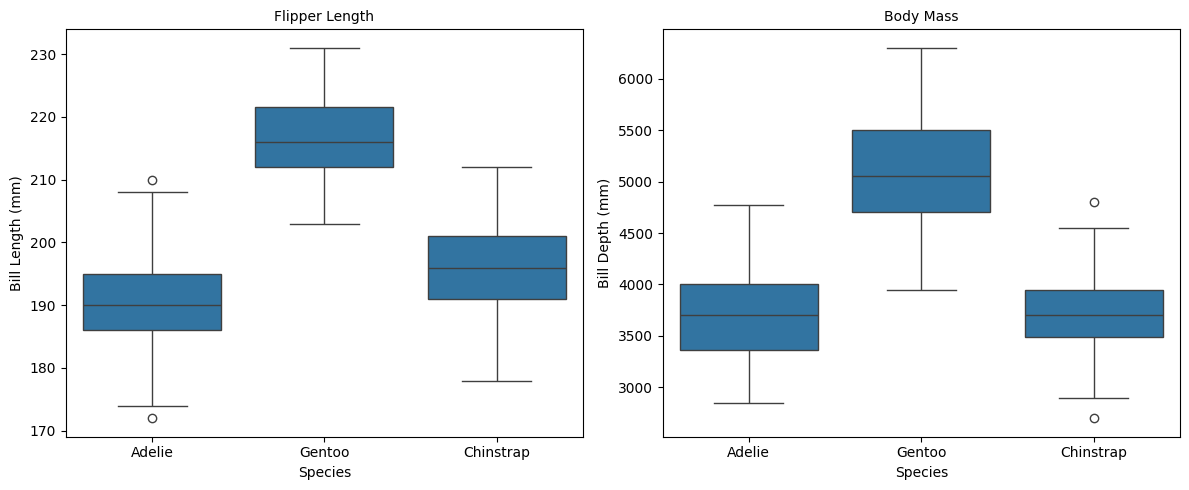

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot Bill Length
sns.boxplot(x='species', y='flipper_length_mm', data=df_clean, ax=axes[0])
axes[0].set_title('Flipper Length', size=10)
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Bill Length (mm)')

# Boxplot Bill Depth
sns.boxplot(x='species', y='body_mass_g', data=df_clean, ax=axes[1])
axes[1].set_title('Body Mass', size=10)
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Bill Depth (mm)')

plt.tight_layout()
plt.show()


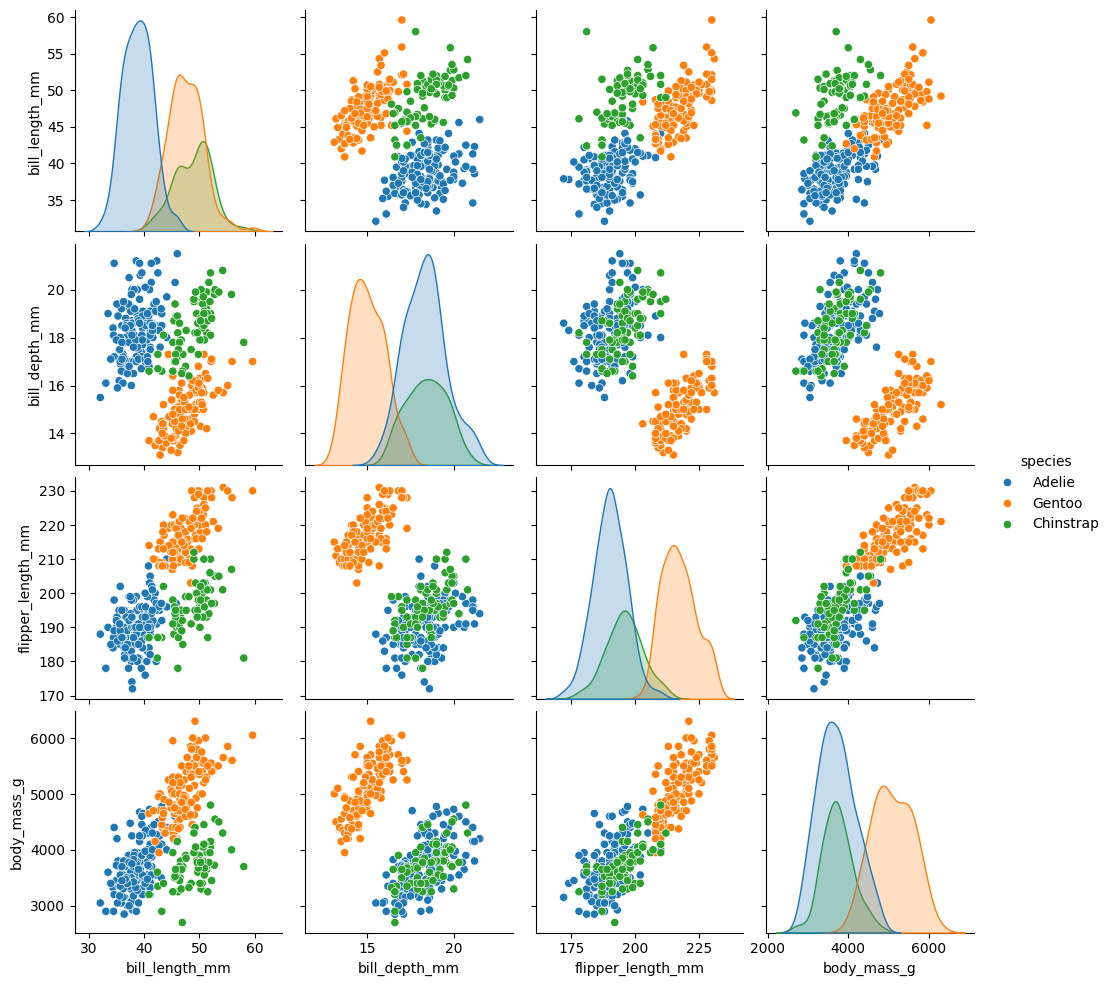

In [ ]:
# Scatter Matrix
sns.pairplot(df_clean,
             vars=['bill_length_mm', 'bill_depth_mm',
                   'flipper_length_mm', 'body_mass_g'],
             hue='species',
             diag_kind='kde')
plt.show()

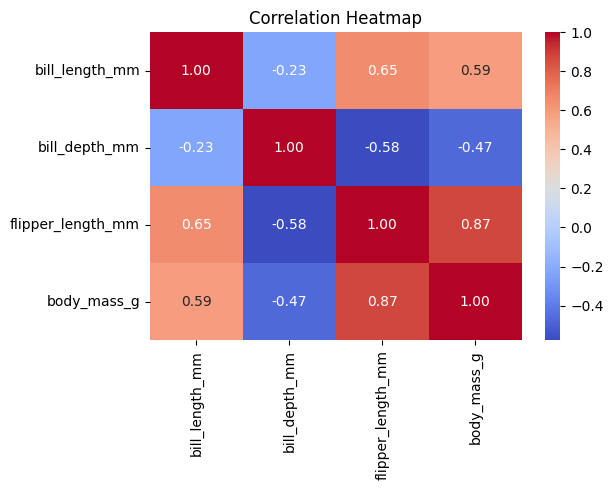

In [ ]:
# Correlation Heatmap
num_cols = ['bill_length_mm', 'bill_depth_mm',
            'flipper_length_mm', 'body_mass_g']

corr = df_clean[num_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Inference

###Feature selection & encoding

In [ ]:
X = df_clean.drop(columns=['species', 'sex', 'island'])
y = df_clean['species']

### Split Data (Train–Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Transformasi / Scaling

In [ ]:
le = LabelEncoder()

cols_to_encode = X_train.select_dtypes(include=['object']).columns
for col in cols_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

### Training Model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

print("Training model selesai.")

Training model selesai.


### Evaluasi & Analisis

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.98

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        44
   Chinstrap       0.91      1.00      0.95        20
      Gentoo       1.00      0.97      0.99        36

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



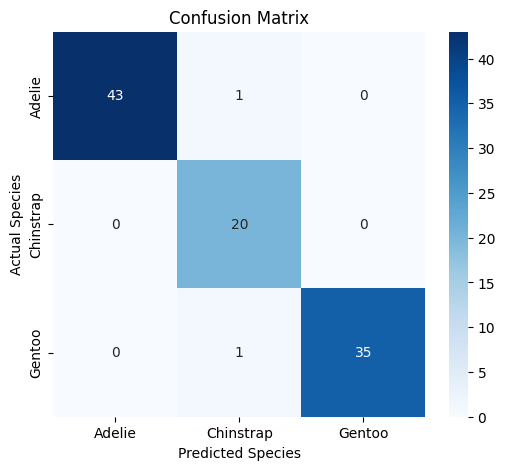

In [ ]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.show()

/tmp/ipython-input-773753662.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


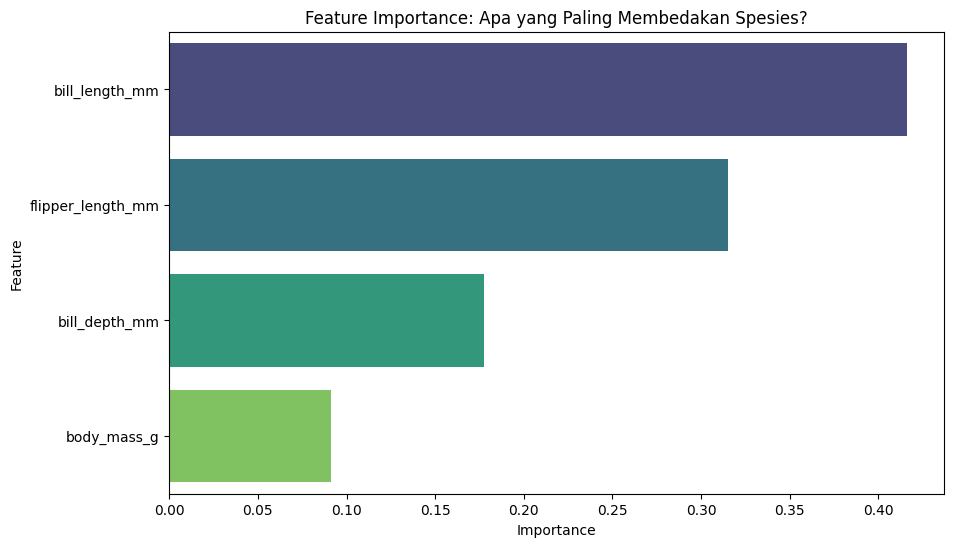

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Feature Importance: Apa yang Paling Membedakan Spesies?')
plt.show()